# Looping through and fitting multiple impedance data sets

In [1]:
import os
import sys
sys.path.append('../../../')

import glob
import numpy as np

## 1. Find all files that match a specified pattern

In [13]:
direc = r'../../../data/'

# Using a search string to find .z files that contain "Circuit" at
# the beginning and EIS towards the end

all_files=glob.glob(direc + '\*Circuit*EIS*.z')

In [14]:
# Let's see what files were found
all_files

['../../../data\\Circuit1_EIS_1.z',
 '../../../data\\Circuit1_EIS_2.z',
 '../../../data\\Circuit2_EIS_1.z',
 '../../../data\\Circuit2_EIS_2.z',
 '../../../data\\Circuit3_EIS_1.z',
 '../../../data\\Circuit3_EIS_2.z']

### 2. Use preprocessing module to read in ZPlot data

In [15]:
from impedance import preprocessing

In [16]:
# Initialize some empty lists for the frequencies and Z data

freqs = []
Zs = []

# Now loop through file names in our list and extract data one by one

for file_name in all_files:
    f, Z = preprocessing.readZPlot(file_name)
    freqs.append(f)
    Zs.append(Z)
    
# Check to see if we extracted data for all the files
print(np.shape(Zs), np.shape(all_files))

(6,) (6,)


## 3. Create a list of circuit models

In [17]:
from impedance.circuits import CustomCircuit

In [18]:
# This data comes from dummy circuits I made to check measurement bias in
# our potentiostat, so I know a priori its an R-RC circuit

circuits = []

circ_string = 'R0-p(R1,C1)'
init_vals = [100, 400, 1e-5]

# Now loop through data list to create circuits and fit them
for f, Z in zip(freqs, Zs):
    circ = CustomCircuit(circ_string, initial_guess=init_vals)
    circ.fit(f, Z)
    circuits.append(circ)

We now have a list of our circuit class objects, all fit to different sets of
data. As you may notice from the file names, there are three unique circuits
each with a replicate set of data. We expect each of the replicates to fit
similarly.

In [19]:
for i, circ in enumerate(circuits):
    print(all_files[i], 'fit parameters: ', circ.parameters_)

../../../data\Circuit1_EIS_1.z fit parameters:  [2.91411416e+01 4.66525564e+01 1.04282637e-05]
../../../data\Circuit1_EIS_2.z fit parameters:  [2.91253693e+01 4.66549221e+01 1.04279218e-05]
../../../data\Circuit2_EIS_1.z fit parameters:  [1.50375981e+02 5.02383852e+02 3.11608181e-08]
../../../data\Circuit2_EIS_2.z fit parameters:  [1.50335672e+02 5.02255554e+02 3.11626029e-08]
../../../data\Circuit3_EIS_1.z fit parameters:  [1.50703275e+03 4.63026199e+03 2.01931522e-08]
../../../data\Circuit3_EIS_2.z fit parameters:  [1.50762897e+03 4.62981683e+03 2.02043628e-08]


Now we'll get the impedance predicted by the fit parameters

In [20]:
fits = []

for i, f in enumerate(freqs):
    fits.append(circuits[i].predict(f))

## 4. Plot the data and fits 
Now we can visualize the data and fits. For now we'll place them all on the same axis

In [21]:
import matplotlib.pyplot as plt

from impedance.plotting import plot_nyquist

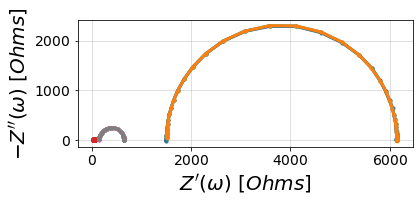

In [22]:
fig, ax = plt.subplots()

for i, (f, Z) in enumerate(zip(freqs, Zs)):  
    # Plotting data
    plot_nyquist(ax, f, Z)
    # Plotting fit
    plot_nyquist(ax, f, fits[i])

plt.show()

Since the circuits have different orders of magnitude impedance, this looks bad
so let's put each pair of data on separate axes. 

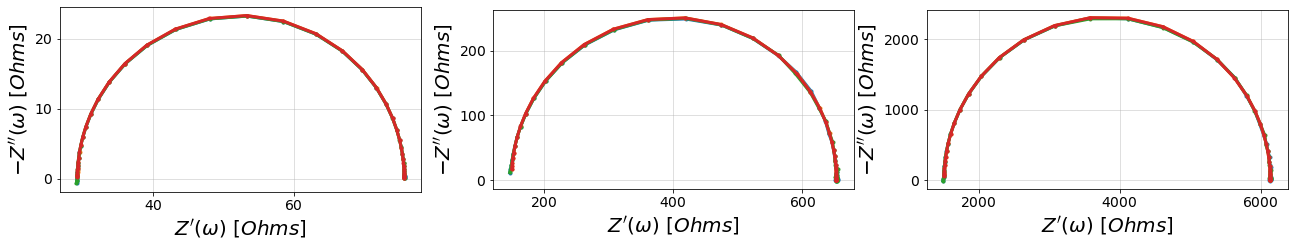

In [23]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(22,6))

for i in range(2):
    plot_nyquist(ax0, freqs[i], Zs[i])
    plot_nyquist(ax0, freqs[i], fits[i])
    
    plot_nyquist(ax1, freqs[i+2], Zs[i+2])
    plot_nyquist(ax1, freqs[i+2], fits[i+2])
    
    plot_nyquist(ax2, freqs[i+4], Zs[i+4])
    plot_nyquist(ax2, freqs[i+4], fits[i+4])

plt.show()